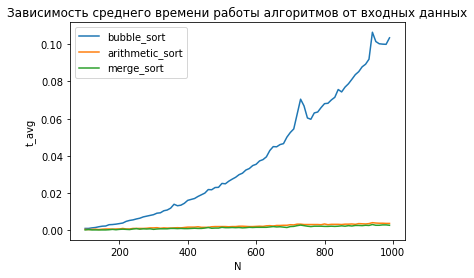

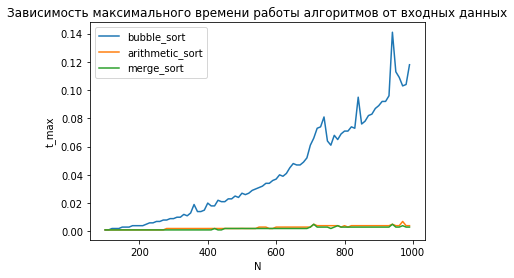

In [44]:
import numpy as np
from random import randint
import time
import matplotlib.pyplot as plt

def bubble_sort(A,N): # сортировка по возрастанию
    for i in range(N-1):
        for j in range(N-i-1):
            if A[j]>A[j+1]:
                temp = A[j]
                A[j] = A[j+1]
                A[j+1] = temp
    return A

def arithmetic_sort(A,N): # N - количество элементов в списке A, который хотим отсортировать
    length = len(str(max(A))) # length - количество символов в наибольшем элементе из списка A
    rang = 10 # число списков в которые будем размещать элементы в зависимости от цифры
    for k in range(length):
        B = [[] for i in range(rang)] # c - список длины rang, состоящий из пустых списков
        for j in range(N):
            figure = A[j] // 10**k % 10
            B[figure].append(A[j])
        A=[]
        for i in range(rang):
            A = A + B[i] 
    return A

def merge(A,B):
    Res = []
    i = 0
    j = 0
    while i < len(A) and j < len(B):
        if A[i] <= B[j]:
            Res.append(A[i])
            i += 1
        else:
            Res.append(B[j])
            j += 1
    Res += A[i:] + B[j:]
    return Res
   
def merge_sort(A):
    if len(A)<=1:
        return A
    else:
        mid = len(A)//2
        L = A[:mid]
        R = A[mid:]
    return merge(merge_sort(L), merge_sort(R))


x = np.arange(100,1000,10) 
N = 10 # N - количество времён в списке lst для которых находим среднее время
y1_avg = []
y1_max = []
y2_avg = []
y2_max = []
y3_avg = []
y3_max = []

for n in x: # n - количество входных данных
    total_time1 = 0
    max_time1 = 0
    total_time2 = 0
    max_time2 = 0
    total_time3 = 0
    max_time3 = 0
    for i in range(N):
        lst = []
        for j in range(n): 
            lst.append(randint(10**6,10**7))  
            
        start_time = time.time()
        bubble_sort(lst,n)
        end_time = time.time()
        alg_time1 = end_time - start_time 
        total_time1 += alg_time1 
        max_time1 = max(max_time1, alg_time1) 
        
        start_time = time.time()
        arithmetic_sort(lst,n)
        end_time = time.time()
        alg_time2 = end_time - start_time 
        total_time2 += alg_time2 
        max_time2 = max(max_time2, alg_time2)
        
        start_time = time.time()
        merge_sort(lst)
        end_time = time.time()
        alg_time3 = end_time - start_time 
        total_time3 += alg_time3 
        max_time3 = max(max_time3, alg_time3)        
    y1_avg.append(total_time1/N)
    y1_max.append(max_time1)
    y2_avg.append(total_time2/N)
    y2_max.append(max_time2)
    y3_avg.append(total_time3/N)
    y3_max.append(max_time3)
                
fig1 = plt.figure()
plt.plot(x,y1_avg,label='bubble_sort') 
plt.plot(x,y2_avg,label='arithmetic_sort')
plt.plot(x,y3_avg,label='merge_sort')
plt.title("Зависимость среднего времени работы алгоритмов от входных данных") 
plt.xlabel("N")
plt.ylabel("t_avg")
plt.legend() 

fig2 = plt.figure()
plt.plot(x,y1_max,label='bubble_sort') 
plt.plot(x,y2_max,label='arithmetic_sort')
plt.plot(x,y3_max,label='merge_sort') 
plt.title("Зависимость максимального времени работы алгоритмов от входных данных")
plt.xlabel("N")
plt.ylabel("t_max")
plt.legend() 